### Reading the data

The new data set is too large for uploading to Github (200+ Mb). Therefore I upload zip and read from zip

In [1]:
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
zf = zipfile.ZipFile('../Data/Base.csv.zip') 
df = pd.read_csv(zf.open('Base.csv'))

### Explore and clean the data

This data is a large and relatively clean one, there is not a lot of things to do.

In [3]:
df.shape

(1000000, 32)

In [4]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [5]:
df.describe(include=np.number)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [6]:
df.iloc[:,0:13].describe(include=np.number)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201


In [7]:
df.iloc[:,13:26].describe(include=np.number)

,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242
std,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859
min,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000
25%,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000
50%,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000
75%,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000
max,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000


In [8]:
df.describe(exclude=np.number)

,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000
unique,5,7,7,2,5
top,AB,CA,BC,INTERNET,other
freq,370554,730252,372143,992952,342728


The binary distribution of fraud is unproportional, need to pay more attention when constructing the train test split

In [9]:
df['fraud_bool'].value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

The column __device_fraud_count__ is useless, and therefore drop it.

In [10]:
df = df.drop(['device_fraud_count'], axis=1) 

### Processing Numeric Data

Metadata explicitly states that three columns, __prev_address_months_count__, __current_address_months_count__, and __bank_months_count__ will take an value of -1 if missing.

There are a few other colums for which -1 are presented but the meaning of -1 is not explicitly stated.

Further examination is needed to determine what to do with them.

__prev_address_months_count__ does not shown to contain much information, it should be droped for convinence.

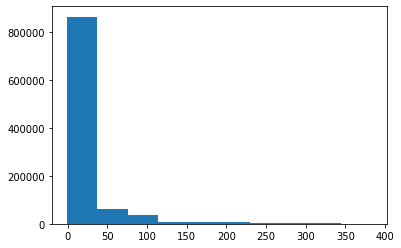

In [11]:
_ = plt.hist(df.prev_address_months_count)

In [12]:
df = df.drop(['prev_address_months_count'],axis=1)

No row of __current_address_months_count__ is taking value -1, therefore do nothing.

In [13]:
df.current_address_months_count.value_counts()

6      16376
7      16270
8      16089
5      15896
9      15688
       ...  
403        1
428        1
413        1
414        1
409        1
Name: current_address_months_count, Length: 423, dtype: int64

__bank_months_count__ seems to contain a lot of useful informations. However, 1/4 of data is missing.

For simplicity, will just drop them for now. Later on, can try interpolate, etc.

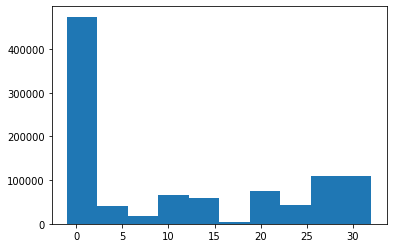

In [14]:
_ = plt.hist(df.bank_months_count)

In [15]:
df.bank_months_count.value_counts()

-1     253635
 1     194802
 28     80082
 15     59141
 30     50777
 31     46084
 25     40450
 10     37158
 20     30850
 21     29098
 5      28001
 2      25836
 26     24779
 11     23745
 6      17678
 29     11696
 3       8580
 19      8212
 22      6741
 9       4801
 16      4563
 27      4197
 4       3834
 24      1822
 12      1121
 7        931
 14       493
 18       491
 23       320
 32        46
 8         30
 17         4
 13         2
Name: bank_months_count, dtype: int64

In [16]:
df = df[df.bank_months_count != -1]
df = df[df.session_length_in_minutes != -1]
df = df[df.device_distinct_emails_8w != -1] 

In [17]:
# df.isnull().sum()

In [18]:
df.shape

(745515, 30)

In [19]:
df['fraud_bool'].value_counts()

0    738632
1      6883
Name: fraud_bool, dtype: int64

<AxesSubplot: xlabel='fraud_bool', ylabel='count'>

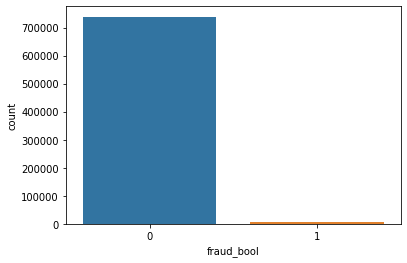

In [20]:
sns.countplot(data=df, x='fraud_bool')

#### UnderSample

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [22]:
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

In [23]:
target_count = pd.Series(y).value_counts()

target_count_1 = target_count[1]
target_count_0 = int(target_count_1 * 4)
sampling_strategy = {0: target_count_0, 1: target_count_1}


In [24]:
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X, y)

print("After resampling:")
print(pd.Series(y_train_resampled).value_counts())

After resampling:
0    27532
1     6883
Name: fraud_bool, dtype: int64


In [25]:
df_resampled = pd.concat([X_train_resampled,y_train_resampled],axis=1)
df_resampled.shape

(34415, 30)

### Processing Categorical Data

In one of notebooks on kaggle, OneHotEncoder is used

In [26]:
# Place holder for further work


In [27]:
cate_var = ['payment_type','employment_status','housing_status',
                     'source','device_os','email_is_free','phone_home_valid',
                     'phone_mobile_valid','has_other_cards','foreign_request',
                     'keep_alive_session','month']
categorical_df = df_resampled[cate_var]

### Overview of the data

I found the fraud data is too small that it can't even shown in plots

In [28]:
# Place holder for further work
# EDA HERE

In [29]:
dfFraud = df_resampled.loc[(df_resampled.fraud_bool == 1)]
dfLegit = df_resampled.loc[(df_resampled.fraud_bool == 0)]

In [30]:
numeric_df = df_resampled.drop(cate_var,axis=1)

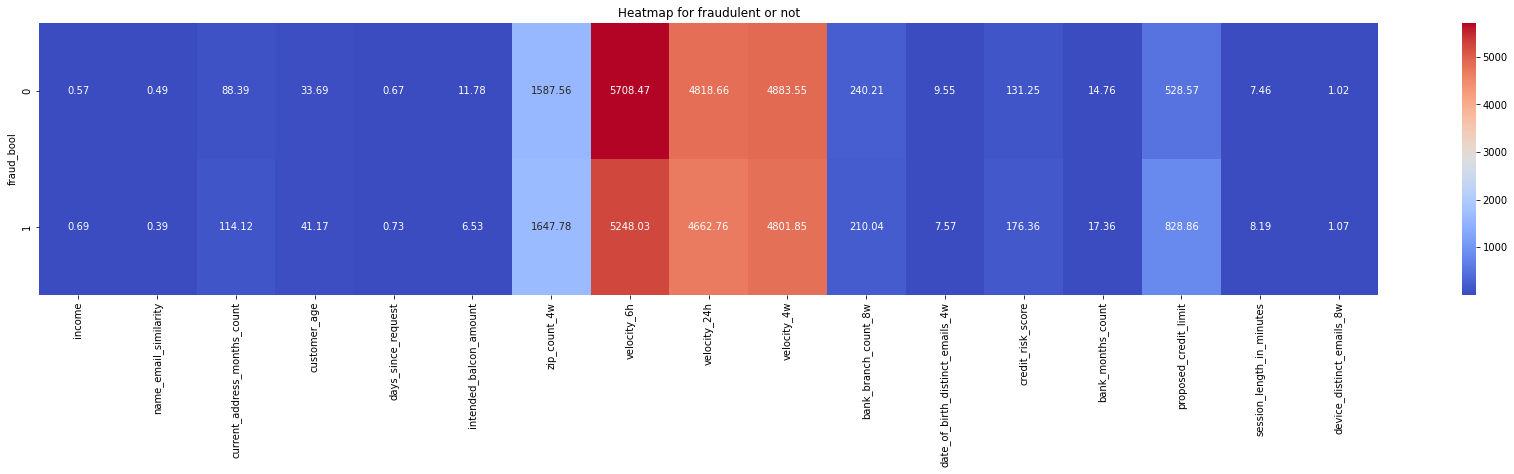

In [31]:
# Calculate the mean of each numeric feature grouped by the 'Fraud' variable
grouped_df = numeric_df.groupby('fraud_bool').mean()

# Create the heatmap using the seaborn library
plt.figure(figsize=(30, 5))
sns.heatmap(grouped_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap for fraudulent or not')
plt.show()

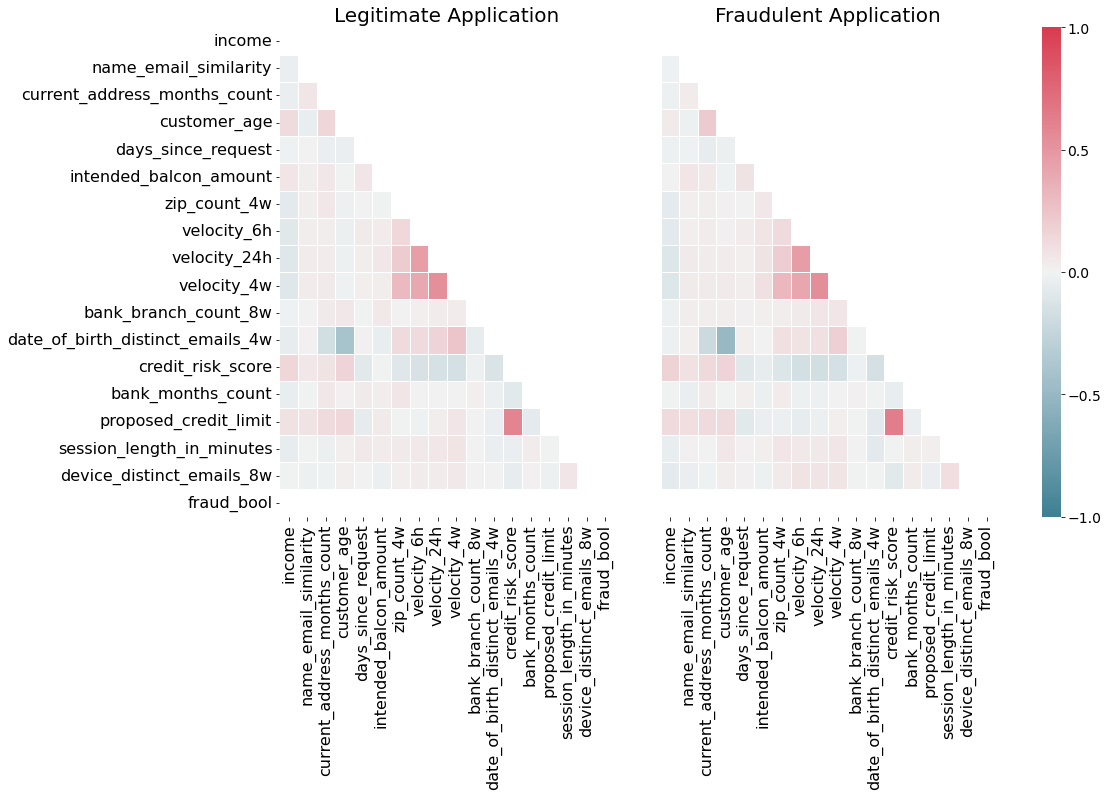

In [32]:
Xfraud = numeric_df.loc[(df_resampled.fraud_bool == 1)] # update Xfraud & XnonFraud with cleaned data
Xlegit = numeric_df.loc[(df_resampled.fraud_bool == 0)]
                  
correlationLegit = Xlegit.loc[:, numeric_df.columns != 'step'].corr()
mask = np.zeros_like(correlationLegit)
indices = np.triu_indices_from(correlationLegit)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationLegit, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Legitimate Application', size = 20)

correlationFraud = Xfraud.loc[:, numeric_df.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent Application', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

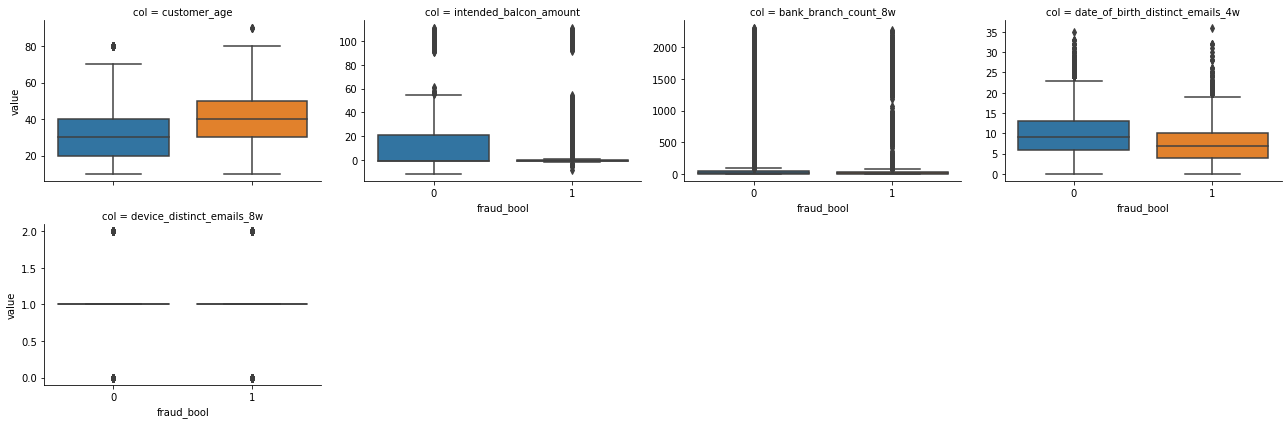

In [33]:
numeric_df_cor = numeric_df[['customer_age','intended_balcon_amount','bank_branch_count_8w',
                             'date_of_birth_distinct_emails_4w','device_distinct_emails_8w','fraud_bool']]
sns.catplot(
    data=numeric_df_cor.melt(id_vars=['fraud_bool'], var_name = "col" ),  
    x='fraud_bool', y='value',
    col='col', kind='box', col_wrap=4, sharey = False,
    height = 3, aspect = 1.5
);

In [34]:
# _= sns.pairplot(numeric_df, hue="fraud_bool", height=3, diag_kind="kde")

In [35]:
df = df_resampled

In [36]:
cate_df = pd.concat([categorical_df,df['fraud_bool']],axis=1)
cate_df.shape

(34415, 13)

In [37]:
cate_df = cate_df.astype('category')

<AxesSubplot: xlabel='fraud_bool', ylabel='count'>

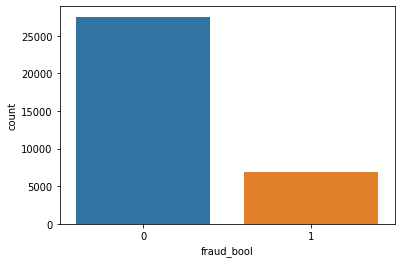

In [38]:
sns.countplot(data=df, x='fraud_bool')

In [39]:
df['fraud_bool'].value_counts()

0    27532
1     6883
Name: fraud_bool, dtype: int64

In [40]:
freqs = {}
for col in cate_df.columns:
    freqs[col] = cate_df[col].value_counts()
freqs

{'payment_type': AB    17276
 AA    10704
 AD     5551
 AC      877
 AE        7
 Name: payment_type, dtype: int64,
 'employment_status': CA    25462
 CB     4754
 CC     1619
 CF     1175
 CD      706
 CE      683
 CG       16
 Name: employment_status, dtype: int64,
 'housing_status': BC    11875
 BA     8377
 BB     7745
 BE     5475
 BD      876
 BF       59
 BG        8
 Name: housing_status, dtype: int64,
 'source': INTERNET    34281
 TELEAPP       134
 Name: source, dtype: int64,
 'device_os': windows      11579
 other        10593
 linux         9969
 macintosh     2011
 x11            263
 Name: device_os, dtype: int64,
 'email_is_free': 1    19152
 0    15263
 Name: email_is_free, dtype: int64,
 'phone_home_valid': 0    20468
 1    13947
 Name: phone_home_valid, dtype: int64,
 'phone_mobile_valid': 1    30444
 0     3971
 Name: phone_mobile_valid, dtype: int64,
 'has_other_cards': 0    27297
 1     7118
 Name: has_other_cards, dtype: int64,
 'foreign_request': 0    33253
 1   

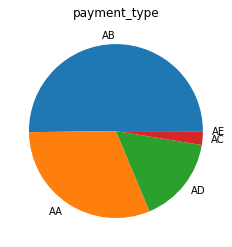

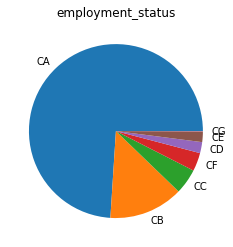

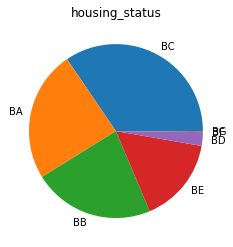

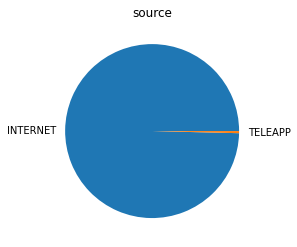

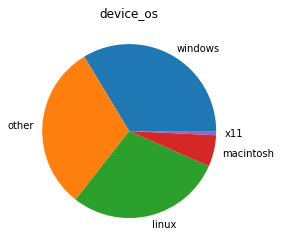

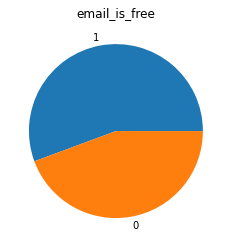

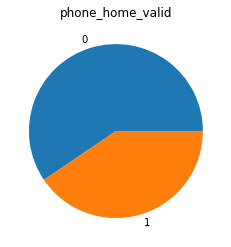

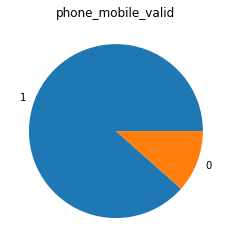

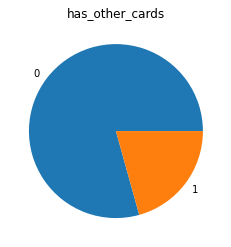

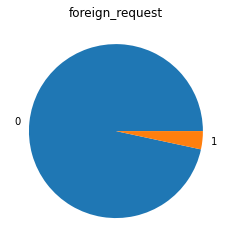

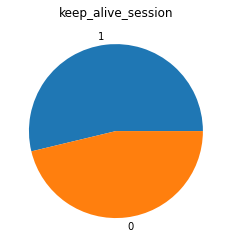

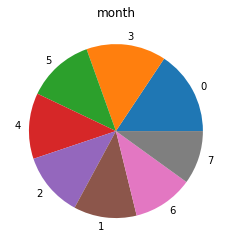

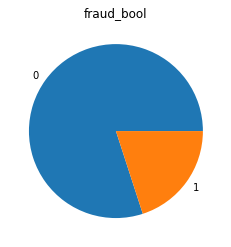

In [41]:
for col, freq in freqs.items():
    plt.figure()
    plt.pie(freq.values, labels=freq.index)
    plt.title(col)
    plt.show()

KeyError: 'month'

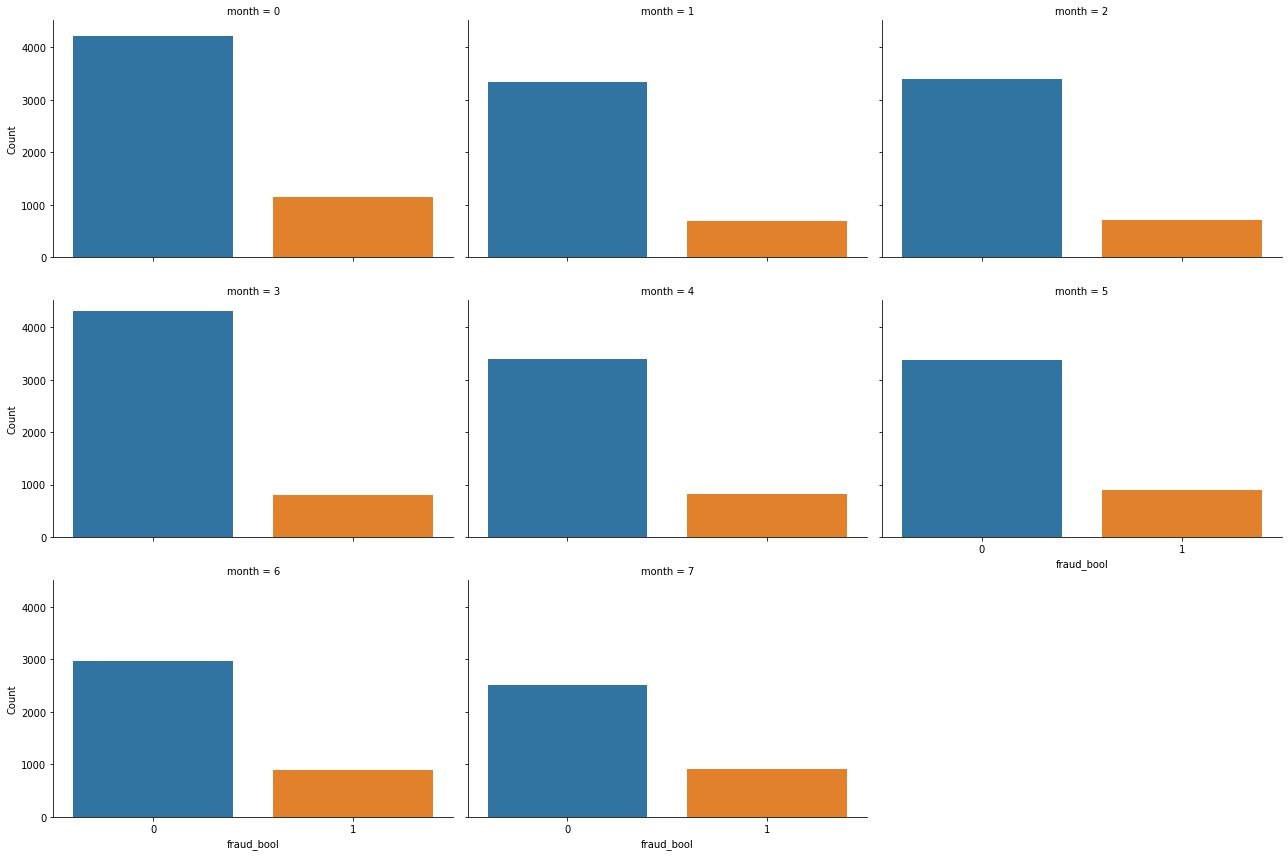

In [42]:
# Assuming 'month' and 'class_label' are the column names for the month and class labels in your dataset
# g = sns.FacetGrid(cate_df, col='month', col_wrap=3, height=4, aspect=1.5)
# g.map_dataframe(sns.histplot, x='fraud_bool', bins=30, kde=True)
# g.set_axis_labels('fraud bool', 'Count')
# g.set_titles('Month: {month}')
# plt.show()

# Assuming 'month' and 'class_label' are the column names for the month and class labels in your dataset
g = sns.catplot(data=cate_df, x='fraud_bool', col='month', kind='count', col_wrap=3, height=4, aspect=1.5)
g.set_axis_labels('fraud_bool', 'Count')
g.set_titles('Month: {month}')
plt.show()

In [ ]:
plt.rcParams.update({
    'font.size': 5,
    'axes.labelsize': 'xx-small',
    'axes.titlesize': 'small',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'xx-small',
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small'
})

for column in cate_df.columns:
    if column != 'fraud_bool':
        values = cate_df[column].value_counts()
        fig, ax = plt.subplots(figsize=(6,4), dpi=300)
        wedges, _, labels = ax.pie(values, autopct='%1.1f%%', textprops={'fontsize': 8},
                                   labeldistance=1.1, startangle=90)
        ax.legend(wedges, values.index, title=column, loc='center left',
                  bbox_to_anchor=(1.0, 0.5))
        plt.setp(labels, fontsize=3)
        plt.setp(wedges, width=0.5)
        plt.title(column)
        plt.show()

In [ ]:
# 画出条形图
for column in cate_df.columns:
    if column != 'fraud_bool':
        values = cate_df[column].value_counts()
        fig, ax = plt.subplots(figsize=(6,4), dpi=300)
        ax.bar(values.index, values.values, color=['#1f77b4', '#ff7f0e'])
        for i, v in enumerate(values.values):
            ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
        plt.xticks(rotation=45)
        plt.yticks(range(0, max(values.values)+1, 30000))
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Counts')
        plt.show()

In [ ]:
# # 绘制两个分类变量的交叉表
# ct = pd.crosstab(df_cat['payment_type'], df_cat['employment_status'])
# print(ct)
# # 绘制堆积柱形图
# sns.set_style('white')
# ct.plot(kind='bar', stacked=True)
# plt.show()

for i in range(len(cate_df.columns)-1):
    for j in range(i+1, len(cate_df.columns)-1):
        table = pd.crosstab(cate_df.iloc[:,i], cate_df.iloc[:,j])
        plt.figure(figsize=(8,4))
        sns.heatmap(table, annot=True, cmap='coolwarm')
        plt.title(f'{cate_df.columns[i]} vs {cate_df.columns[j]}')
        plt.show()

In [ ]:
from scipy import stats

# 计算变量之间的Cramer's V相关系数
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corr_matrix_cat = pd.DataFrame(np.zeros((len(cate_df.columns), len(cate_df.columns))), columns=cate_df.columns, index=cate_df.columns)
for i in range(len(cate_df.columns)):
    for j in range(i, len(cate_df.columns)):
        corr_matrix_cat.iloc[i,j] = cramers_v(cate_df.iloc[:,i], cate_df.iloc[:,j])
        corr_matrix_cat.iloc[j,i] = corr_matrix_cat.iloc[i,j]

# 创建热力图可视化相关系数矩阵
plt.figure(figsize=(10,8),dpi=300)
sns.heatmap(corr_matrix_cat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Store the data for the Data Preprocessing

In [ ]:
%store df

### Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [ ]:
X = df.drop('fraud_bool',axis=1)

In [ ]:
X